Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">Florian</p>| <p style="text-align: left">Haslauer</p> | k12008697 |
| <p style="text-align: left">David</p>| <p style="text-align: left">Hauser</p> | k01552420 |


<h2 style="text-align: center">344.105/6/7 UE: Natural Language Processing (WS2022/23)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of this assignment is to implement a document (sentence) classification model using (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f083887a0401841aee8fab3d36/44093/-2905493136371866025/nlp2022_23_data.zip).

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.label.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>



<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
**Preprocessing (4 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (4 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (4 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other methods discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

**Dimensionality reduction (3 points).** Reduce vectors' dimensions to $k$ by applying Latent Semantic Analysis (LSA) to the vectors of both variations. $k$ is a hyper-parameter and can be $10<k<1000$. Keep in mind the training and inference phases of LSA, when applied to the train, validation, and test sets. 

At the end of Task A, you should have the <ins>four feature vectors variations</ins> shown below, each consisting of the sets of train, validation, and test:
- **`Token Weighting I - High Dimensional`**
- **`Token Weighting I - Low Dimensional`**
- **`Token Weighting II - High Dimensional`**
- **`Token Weighting II - Low Dimensional`**


</div>

In [365]:
import numpy as np
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.decomposition import TruncatedSVD as LSA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hause\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hause\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hause\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Preprocessing

#### Load data:

In [2]:
train = pd.read_csv('nlp2022_23_data/thedeep.subset.train.txt', sep=",", header=None)
train.columns = ["sentence_id", "text", "label"]
test = pd.read_csv('nlp2022_23_data/thedeep.subset.test.txt', sep=",", header=None)
test.columns = ["sentence_id", "text", "label"]
val = pd.read_csv('nlp2022_23_data/thedeep.subset.validation.txt', sep=",", header=None)
val.columns = ["sentence_id", "text", "label"]
sentence_unprocessed = train['text'][11]
print('raw data:' '\n')
print(sentence_unprocessed)

raw data:

Regional instability and civil conflict have driven population displacement and exacerbated food insecurity in Niger. As of October, the Office of the UN High Commissioner for Refugees reported that Niger hosted approximately 57,400 and 108,500 refugees from Mali and Nigeria, respectively. In addition, the Boko Haram-related insurgency has displaced approximately 129,000 Nigeriens within the country.


#### Cleaning:
remove punctuation and numbers. Additionally set everything to lowercase

In [3]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
train['text'] = train['text'].apply(clean_text)
test['text'] = test['text'].apply(clean_text)
val['text'] = val['text'].apply(clean_text)
sentence_cleaned = train['text'][11]
print('data after cleaning:' '\n')
print(sentence_cleaned)

data after cleaning:

regional instability and civil conflict have driven population displacement and exacerbated food insecurity in niger  as of october  the office of the un high commissioner for refugees reported that niger hosted approximately        and         refugees from mali and nigeria  respectively  in addition  the boko haram related insurgency has displaced approximately         nigeriens within the country 


#### Tokenization:
Tokenize using nltk and lemmatizing

In [4]:
train['text'] = train['text'].apply(word_tokenize)
test['text'] = test['text'].apply(word_tokenize)
val['text'] = val['text'].apply(word_tokenize)

In [5]:
lemma = WordNetLemmatizer()
def lemmatize(token):
    return [lemma.lemmatize(word=w,pos='v') for w in token]
train['text'] = train['text'].apply(lemmatize)
test['text'] = test['text'].apply(lemmatize)
val['text'] = val['text'].apply(lemmatize)
sentence_tokenized = train['text'][11]
print('data after tokenizing:' '\n')
print(sentence_tokenized)

data after tokenizing:

['regional', 'instability', 'and', 'civil', 'conflict', 'have', 'drive', 'population', 'displacement', 'and', 'exacerbate', 'food', 'insecurity', 'in', 'niger', 'as', 'of', 'october', 'the', 'office', 'of', 'the', 'un', 'high', 'commissioner', 'for', 'refugees', 'report', 'that', 'niger', 'host', 'approximately', 'and', 'refugees', 'from', 'mali', 'and', 'nigeria', 'respectively', 'in', 'addition', 'the', 'boko', 'haram', 'relate', 'insurgency', 'have', 'displace', 'approximately', 'nigeriens', 'within', 'the', 'country']


# Creating Dictionary

create dictionary

In [6]:
token_dict = {}
for tokens in tqdm(train['text']):
    for token in tokens:
        if token not in token_dict.keys():
            token_dict[token] = 1
        else:
            token_dict[token] += 1
print('length of dictionary:' '\n')
print(len(token_dict))

100%|█████████████████████████████████████████████████████████████████████████| 12110/12110 [00:00<00:00, 12979.26it/s]

length of dictionary:

22620


cut everything with a frequency lower than a threshold

In [7]:
threshold = 10
oov = []
for token in tqdm(token_dict):
    if token_dict[token] < threshold:
        oov.append(token)
for token in oov:
    del token_dict[token]
vocab = list(token_dict.keys())
print('length of dictionary after reduction:' '\n')
print(len(token_dict))

100%|████████████████████████████████████████████████████████████████████████| 22620/22620 [00:00<00:00, 585410.61it/s]

length of dictionary after reduction:

4553


remove all out of vocabulary words

In [8]:
print('length of a random sentence before removing oov:' '\n')
print(len(train['text'][2]))
for tokens in tqdm(train['text']):
    oov_words = []
    for i in range(len(tokens)):
        if tokens[i] not in vocab:
            oov_words.append(i)
    for i in sorted(oov_words, reverse=True):
        del tokens[i]

for tokens in tqdm(test['text']):
    oov_words = []
    for i in range(len(tokens)):
        if tokens[i] not in vocab:
            oov_words.append(i)
    for i in sorted(oov_words, reverse=True):
        del tokens[i]

for tokens in tqdm(val['text']):
    oov_words = []
    for i in range(len(tokens)):
        if tokens[i] not in vocab:
            oov_words.append(i)
    for i in sorted(oov_words, reverse=True):
        del tokens[i]

print('length of a random sentence after removing oov:' '\n')
print(len(train['text'][2]))

length of a random sentence before removing oov:

84


100%|█████████████████████████████████████████████████████████████████████████████| 2596/2596 [00:12<00:00, 211.79it/s]

length of a random sentence after removing oov:

80


# Creating sentence vectors

#### Term frequency

In [9]:
def get_tf(document, word):
    tc = [token for token in document if token == word]
    return np.log(1+len(tc))

def tf(data, vocab):
    tf = np.zeros((len(data), len(vocab)))
    for i in tqdm(range(len(data))):
        document = data[i]
        for word in list(dict.fromkeys(document)):
            word_idx = vocab.index(word)
            tf[i][word_idx] = get_tf(document, word)
    return tf

vocab = list(token_dict.keys())
tf_train = tf(train['text'], vocab)
tf_test = tf(test['text'], vocab)
tf_val = tf(val['text'], vocab)

100%|█████████████████████████████████████████████████████████████████████████████| 2596/2596 [00:10<00:00, 256.82it/s]


#### tf-idf

In [10]:
def get_idf(data, word):
    df = 1
    for document in data:
        if word in document:
            df += 1
    return np.log(len(data)/df)

def tf_idf(data, vocab):
    tf_idf = np.zeros((len(data), len(vocab)))
    for j in tqdm(range(len(vocab))):
        word = vocab[j]
        idf = get_idf(data, word)
        for i in range(len(data)):
            document = data[i]
            tf = get_tf(document, word)
            tf_idf[i][j] = tf*idf
    return tf_idf

tf_idf_train = tf_idf(train['text'], vocab)
tf_idf_test = tf_idf(test['text'], vocab)
tf_idf_val = tf_idf(val['text'], vocab)

100%|██████████████████████████████████████████████████████████████████████████████| 4553/4553 [02:19<00:00, 32.54it/s]


In [11]:
def get_sparsity(A):
    return (1.0 - (np.count_nonzero(A)/float(A.size)))

print('Sparsity of the training data: ', get_sparsity(tf_train))
print('Sparsity of the test data: ', get_sparsity(tf_test))
print('Sparsity of the validation data: ', get_sparsity(tf_val))

Sparsity of the training data:  0.9904282854128538
Sparsity of the test data:  0.9905418815940875
Sparsity of the validation data:  0.9905365567733833


# Dimensionality reduction 

LSA using Sklean

In [160]:
k_low = 50
k_high = 700
lsa_tf_low = LSA(n_components=k_low)
lsa_tf_low.fit(tf_train)
lsa_tf_low_train = lsa_tf_low.transform(tf_train)
lsa_tf_low_test = lsa_tf_low.transform(tf_test)
lsa_tf_low_val = lsa_tf_low.transform(tf_val)

print('lsa_tf_low done')

lsa_tfidf_low = LSA(n_components=k_low)
lsa_tfidf_low.fit(tf_idf_train)
lsa_tfidf_low_train = lsa_tfidf_low.transform(tf_idf_train)
lsa_tfidf_low_test = lsa_tfidf_low.transform(tf_idf_test)
lsa_tfidf_low_val = lsa_tfidf_low.transform(tf_idf_val)

print('lsa_tfidf_low done')

lsa_tf_high = LSA(n_components=k_high)
lsa_tf_high.fit(tf_train)
lsa_tf_high_train = lsa_tf_high.transform(tf_train)
lsa_tf_high_test = lsa_tf_high.transform(tf_test)
lsa_tf_high_val = lsa_tf_high.transform(tf_val)

print('lsa_tf_high done')

lsa_tfidf_high = LSA(n_components=k_high)
lsa_tfidf_high.fit(tf_idf_train)
lsa_tfidf_high_train = lsa_tfidf_high.transform(tf_idf_train)
lsa_tfidf_high_test = lsa_tfidf_high.transform(tf_idf_test)
lsa_tfidf_high_val = lsa_tfidf_high.transform(tf_idf_val)

print('lsa_tfidf_high done')

lsa_tf_low done
lsa_tfidf_low done
lsa_tf_high done
lsa_tfidf_high done


<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

To evaluate the models, use <ins>accuracy</ins> as the metric throughout the task. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>eight experiment sets</ins> (4 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters (also keep in mind the dimensionality size $k$ in the low-dimensional vectors as yet another hyper-parameter). For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>five different values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected model of the eight experiment on the test set and report the results of the experiments on <ins>both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.


</div>

In [223]:
#run experiment with given model_class for all given params in params_list
def run_experiment(model_class, params_list, X_train, y_train, X_val, y_val):
    best_acc = 0
    best_params = {}
    best_model = None
    for params in params_list:
        print("Hyper params:", params)
        model = model_class(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_params = params
            best_model = model
        print('Validation accuracy', acc)
        print()
    print('Best accuracy: ', best_acc)
    print('Best params: ', best_params)
    return best_acc, best_model, best_params

# Dummy baseline (2 points)

In [224]:
#baseline classifier
class Baseline:
    
    def fit(self, X, y):
        self.mode = y.mode()[0] #store most common class label in train data
        
    def predict(self, X):
        return np.full(X.shape[0], self.mode) #return mode with length of input X


# Training and tuning classifiers (5 points)

## Embedding: lsa_tf_low

In [225]:
#lsa_tf_low
X_train = lsa_tf_low_train
y_train = train['label']
X_val = lsa_tf_low_val
y_val = val['label']

In [226]:
#baseline
params_list = [{}]
run_experiment(Baseline, params_list, X_train, y_train, X_val, y_val)

Hyper params: {}
Validation accuracy 0.2561633281972265

Best accuracy:  0.2561633281972265
Best params:  {}


(0.2561633281972265, <__main__.Baseline at 0x29dd36e14f0>, {})

### Experiment 1

In [227]:
#kNN 
params_list = [{'n_neighbors': 2}, {'n_neighbors': 4}, {'n_neighbors': 8}, {'n_neighbors': 16}, {'n_neighbors': 32}]
best_acc_ex1, best_model_ex1, _ = run_experiment(KNeighborsClassifier, params_list, X_train, y_train, X_val, y_val)

Hyper params: {'n_neighbors': 2}
Validation accuracy 0.4973035439137134

Hyper params: {'n_neighbors': 4}
Validation accuracy 0.5720338983050848

Hyper params: {'n_neighbors': 8}
Validation accuracy 0.6128659476117103

Hyper params: {'n_neighbors': 16}
Validation accuracy 0.6275038520801233

Hyper params: {'n_neighbors': 32}
Validation accuracy 0.6290446841294299

Best accuracy:  0.6290446841294299
Best params:  {'n_neighbors': 32}


### Experiment 2

In [228]:
#Random Forest 
params_list = [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 200}, {'n_estimators': 400}]
best_acc_ex2, best_model_ex2, _ = run_experiment(RandomForestClassifier, params_list, X_train, y_train, X_val, y_val)

Hyper params: {'n_estimators': 10}
Validation accuracy 0.5989984591679507

Hyper params: {'n_estimators': 50}
Validation accuracy 0.6633281972265023

Hyper params: {'n_estimators': 100}
Validation accuracy 0.6702619414483821

Hyper params: {'n_estimators': 200}
Validation accuracy 0.6718027734976888

Hyper params: {'n_estimators': 400}
Validation accuracy 0.6806625577812019

Best accuracy:  0.6806625577812019
Best params:  {'n_estimators': 400}


## Embedding: lsa_tfidf_low

In [229]:
#lsa_tfidf_low
X_train = lsa_tfidf_low_train
y_train = train['label']
X_val = lsa_tfidf_low_val
y_val = val['label']

In [230]:
#baseline
params_list = [{}]
run_experiment(Baseline, params_list, X_train, y_train, X_val, y_val)

Hyper params: {}
Validation accuracy 0.2561633281972265

Best accuracy:  0.2561633281972265
Best params:  {}


(0.2561633281972265, <__main__.Baseline at 0x29dd2c71af0>, {})

### Experiment 3

In [231]:
#kNN 
params_list = [{'n_neighbors': 2}, {'n_neighbors': 4}, {'n_neighbors': 8}, {'n_neighbors': 16}, {'n_neighbors': 32}]
best_acc_ex3, best_model_ex3, _  = run_experiment(KNeighborsClassifier, params_list, X_train, y_train, X_val, y_val)

Hyper params: {'n_neighbors': 2}
Validation accuracy 0.6791217257318952

Hyper params: {'n_neighbors': 4}
Validation accuracy 0.7338212634822804

Hyper params: {'n_neighbors': 8}
Validation accuracy 0.75115562403698

Hyper params: {'n_neighbors': 16}
Validation accuracy 0.7569337442218799

Hyper params: {'n_neighbors': 32}
Validation accuracy 0.7503852080123267

Best accuracy:  0.7569337442218799
Best params:  {'n_neighbors': 16}


### Experiment 4

In [232]:
#Random Forest 
params_list = [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 200}, {'n_estimators': 400}]
best_acc_ex4, best_model_ex4, _  = run_experiment(RandomForestClassifier, params_list, X_train, y_train, X_val, y_val)

Hyper params: {'n_estimators': 10}
Validation accuracy 0.7245762711864406

Hyper params: {'n_estimators': 50}
Validation accuracy 0.7711864406779662

Hyper params: {'n_estimators': 100}
Validation accuracy 0.762326656394453

Hyper params: {'n_estimators': 200}
Validation accuracy 0.7661787365177196

Hyper params: {'n_estimators': 400}
Validation accuracy 0.7638674884437596

Best accuracy:  0.7711864406779662
Best params:  {'n_estimators': 50}


## Embedding: lsa_tf_high

In [247]:
#lsa_tf_high
X_train = lsa_tf_high_train
y_train = train['label']
X_val = lsa_tf_high_val
y_val = val['label']

In [248]:
#baseline
params_list = [{}]
run_experiment(Baseline, params_list, X_train, y_train, X_val, y_val)

Hyper params: {}
Validation accuracy 0.2561633281972265

Best accuracy:  0.2561633281972265
Best params:  {}


(0.2561633281972265, <__main__.Baseline at 0x29dfee993d0>, {})

### Experiment 5

In [249]:
#kNN 
params_list = [{'n_neighbors': 2}, {'n_neighbors': 4}, {'n_neighbors': 8}, {'n_neighbors': 16}, {'n_neighbors': 32}]
best_acc_ex5, best_model_ex5, _ = run_experiment(KNeighborsClassifier, params_list, X_train, y_train, X_val, y_val)

Hyper params: {'n_neighbors': 2}
Validation accuracy 0.5231124807395994

Hyper params: {'n_neighbors': 4}
Validation accuracy 0.5816640986132512

Hyper params: {'n_neighbors': 8}
Validation accuracy 0.6290446841294299

Hyper params: {'n_neighbors': 16}
Validation accuracy 0.6359784283513097

Hyper params: {'n_neighbors': 32}
Validation accuracy 0.6479198767334361

Best accuracy:  0.6479198767334361
Best params:  {'n_neighbors': 32}


### Experiment 6

In [251]:
#Random Forest 
params_list = [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 200}, {'n_estimators': 400}]
best_acc_ex6, best_model_ex6, _ = run_experiment(RandomForestClassifier, params_list, X_train, y_train, X_val, y_val)

Hyper params: {'n_estimators': 10}
Validation accuracy 0.4449152542372881

Hyper params: {'n_estimators': 50}
Validation accuracy 0.588597842835131

Hyper params: {'n_estimators': 100}
Validation accuracy 0.6201848998459168

Hyper params: {'n_estimators': 200}
Validation accuracy 0.6302003081664098

Hyper params: {'n_estimators': 400}
Validation accuracy 0.6394453004622496

Best accuracy:  0.6394453004622496
Best params:  {'n_estimators': 400}


## Embedding: lsa_tfidf_high

In [235]:
#lsa_tf_high
X_train = lsa_tfidf_high_train
y_train = train['label']
X_val = lsa_tfidf_high_val
y_val = val['label']

In [236]:
#baseline
params_list = [{}]
run_experiment(Baseline, params_list, X_train, y_train, X_val, y_val)

Hyper params: {}
Validation accuracy 0.2561633281972265

Best accuracy:  0.2561633281972265
Best params:  {}


(0.2561633281972265, <__main__.Baseline at 0x29dd2c63130>, {})

#### Experiment 7

In [237]:
#kNN 
params_list = [{'n_neighbors': 2}, {'n_neighbors': 4}, {'n_neighbors': 8}, {'n_neighbors': 16}, {'n_neighbors': 32}]
best_acc_ex7, best_model_ex7, _ = run_experiment(KNeighborsClassifier, params_list, X_train, y_train, X_val, y_val)

Hyper params: {'n_neighbors': 2}
Validation accuracy 0.6190292758089369

Hyper params: {'n_neighbors': 4}
Validation accuracy 0.6637134052388289

Hyper params: {'n_neighbors': 8}
Validation accuracy 0.6910631741140215

Hyper params: {'n_neighbors': 16}
Validation accuracy 0.6875963020030816

Hyper params: {'n_neighbors': 32}
Validation accuracy 0.6479198767334361

Best accuracy:  0.6910631741140215
Best params:  {'n_neighbors': 8}


#### Experiment 8

In [238]:
#Random Forest 
params_list = [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 200}, {'n_estimators': 400}]
best_acc_ex8, best_model_ex8, _ = run_experiment(RandomForestClassifier, params_list, X_train, y_train, X_val, y_val)

Hyper params: {'n_estimators': 10}
Validation accuracy 0.6140215716486903

Hyper params: {'n_estimators': 50}
Validation accuracy 0.7110939907550077

Hyper params: {'n_estimators': 100}
Validation accuracy 0.727657935285054

Hyper params: {'n_estimators': 200}
Validation accuracy 0.7295839753466872

Hyper params: {'n_estimators': 400}
Validation accuracy 0.7322804314329738

Best accuracy:  0.7322804314329738
Best params:  {'n_estimators': 400}


# Evaluation, reporting results, and discussion (3 point)

In [252]:
validation_test_set_comparison = np.empty((8, 2))

#save validation and test results in matrix; test is column [0] and validation is column [1]; rows contain kNN and RF alternating 
#e.g. Row 0 is kNN; Row 1 is RF
validation_test_set_comparison[0][0] = accuracy_score(test['label'], best_model_ex1.predict(lsa_tf_low_test))
validation_test_set_comparison[0][1] = best_acc_ex1
validation_test_set_comparison[1][0] = accuracy_score(test['label'], best_model_ex2.predict(lsa_tf_low_test))
validation_test_set_comparison[1][1] = best_acc_ex2
validation_test_set_comparison[2][0] = accuracy_score(test['label'], best_model_ex3.predict(lsa_tfidf_low_test))
validation_test_set_comparison[2][1] = best_acc_ex3
validation_test_set_comparison[3][0] = accuracy_score(test['label'], best_model_ex4.predict(lsa_tfidf_low_test))
validation_test_set_comparison[3][1] = best_acc_ex4
validation_test_set_comparison[4][0] = accuracy_score(test['label'], best_model_ex5.predict(lsa_tf_high_test))
validation_test_set_comparison[4][1] = best_acc_ex5
validation_test_set_comparison[5][0] = accuracy_score(test['label'], best_model_ex6.predict(lsa_tf_high_test))
validation_test_set_comparison[5][1] = best_acc_ex6
validation_test_set_comparison[6][0] = accuracy_score(test['label'], best_model_ex7.predict(lsa_tfidf_high_test))
validation_test_set_comparison[6][1] = best_acc_ex7
validation_test_set_comparison[7][0] = accuracy_score(test['label'], best_model_ex8.predict(lsa_tfidf_high_test))
validation_test_set_comparison[7][1] = best_acc_ex8


In [256]:
df = pd.DataFrame(validation_test_set_comparison, columns=['Test', 'Validation'])
df['embedding'] = ['lsa_tf_low', 'lsa_tf_low', 'lsa_tfidf_low', 'lsa_tfidf_low', 'lsa_tf_high', 'lsa_tf_high', 'lsa_tfidf_high', 'lsa_tfidf_high']
df['classifier'] = ['kNN', 'Random Forest', 'kNN', 'Random Forest', 'kNN', 'Random Forest', 'kNN', 'Random Forest',]
df['experiment_num'] = [1,2,3,4,5,6,7,8]
df

,Test,Validation,embedding,classifier,experiment_num
0,0.629287,0.629045,lsa_tf_low,kNN,1
1,0.688247,0.680663,lsa_tf_low,Random Forest,2
2,0.762235,0.756934,lsa_tfidf_low,kNN,3
3,0.764547,0.771186,lsa_tfidf_low,Random Forest,4
4,0.643545,0.647920,lsa_tf_high,kNN,5
5,0.641233,0.639445,lsa_tf_high,Random Forest,6
6,0.699807,0.691063,lsa_tfidf_high,kNN,7
7,0.742967,0.732280,lsa_tfidf_high,Random Forest,8


In [289]:
accuracies_stacked = validation_test_set_comparison.flatten(order='F')
df_plot = pd.DataFrame(accuracies_stacked, columns=['accuracy'])
df_plot['dataset'] = ['Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Test', 'Validation', 'Validation', 'Validation', 'Validation', 'Validation', 'Validation', 'Validation', 'Validation']
df_plot['model_class'] = ['kNN', 'Random Forest', 'kNN', 'Random Forest', 'kNN', 'Random Forest', 'kNN', 'Random Forest', 'kNN', 'Random Forest', 'kNN', 'Random Forest', 'kNN', 'Random Forest', 'kNN', 'Random Forest']
df_plot['embedding'] = ['lsa_tf_low', 'lsa_tf_low', 'lsa_tfidf_low', 'lsa_tfidf_low', 'lsa_tf_high', 'lsa_tf_high', 'lsa_tfidf_high', 'lsa_tfidf_high', 'lsa_tf_low', 'lsa_tf_low', 'lsa_tfidf_low', 'lsa_tfidf_low', 'lsa_tf_high', 'lsa_tf_high', 'lsa_tfidf_high', 'lsa_tfidf_high']

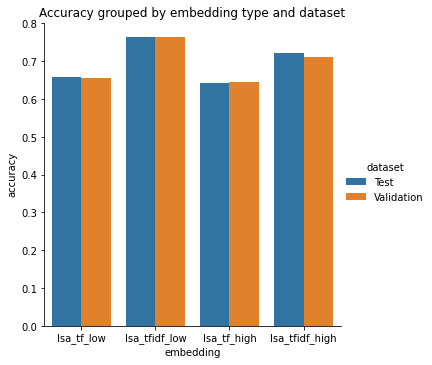

In [294]:
g = sns.catplot(
    data=df_plot, kind="bar",
    x="embedding", y="accuracy", hue="dataset", ci=None
)
g.set(title='Accuracy grouped by embedding type and dataset')

The most important factor seems to be the type of embedding used. The highest results are achieved both on the validation as well as test set with the lsa_tfidf embedding type with k=50. 
Interestingly, we achieve slightly better results on the Test set than on the Validation set. We are unsure why this is the case, and believe it might just be a coincidence (?). 

# Confusion matrix (2 point)

In [299]:
#best model on test set
best_model = best_model_ex4

y_pred = best_model.predict(lsa_tfidf_low_test)
y_true = test['label']

cf_matrix = confusion_matrix(y_true, y_pred)

In [301]:
cf_matrix

array([[  8,   0,   0,  26,   0,   6,   1,   0,   0,   3,   1,   0],
       [  0,  11,   2,  18,  10,   0,   0,   1,   2,  38,  19,   6],
       [  0,   0, 101,   2,   1,   1,   0,   0,   0,  11,   7,   0],
       [  6,   1,   0, 360,   7,   3,   0,   1,   1,  22,   3,   1],
       [  1,   2,   1,   6, 573,   1,   0,   1,   3,  28,   6,  13],
       [  3,   2,   0,  47,   9,  17,   1,   0,   0,  29,  11,   2],
       [  0,   5,   0,   4,   5,   0,   1,   1,   0,  12,   6,   1],
       [  0,   1,   0,   6,   5,   0,   0,  13,   2,   7,   8,   3],
       [  0,   1,   0,  10,   8,   0,   0,   0,  85,   7,   1,   0],
       [  0,   2,  10,   8,  21,   4,   0,   0,   1, 557,  10,   2],
       [  0,   1,   1,   4,   4,   1,   0,   0,   0,  34, 133,   2],
       [  0,   2,   3,  10,  12,   0,   0,   2,   1,  12,   5, 125]],
      dtype=int64)

<AxesSubplot:>

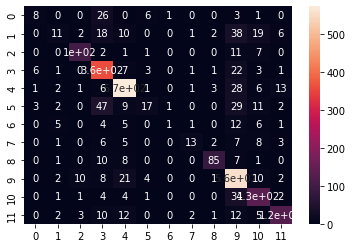

In [300]:
sns.heatmap(cf_matrix, annot=True)

From the confusion matrix it stands out that the classes 4, 5 and 9 are predicted particularly well. Interestingly class 4 has the highest number correctly predicted samples. This might be because it is also the class that occurs most often in the dataset. 

We cannot see any very significant confusions. However, classes 3, 9 and 10 stick out with being the most often been falsely predicted by our model. 

# TSNE

In [303]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(lsa_tfidf_low_test)

In [307]:
df = pd.DataFrame(X_embedded, columns=['x', 'y'])
df['y_true'] = test['label']
df['y_pred'] = best_model.predict(lsa_tfidf_low_test)
df

,x,y,y_true,y_pred
0,-33.775646,59.075485,8,8
1,-39.988037,-19.005304,9,4
2,12.073115,53.208172,3,3
3,-53.529324,-19.351446,9,9
4,-35.427448,58.771694,8,8
...,...,...,...,...
2590,44.484474,2.051450,10,10
2591,54.861607,3.708147,10,10
2592,10.952714,26.543146,11,11
2593,8.374999,30.756342,11,11


Text(0.5, 1.0, 'Coloring with predicted classes')

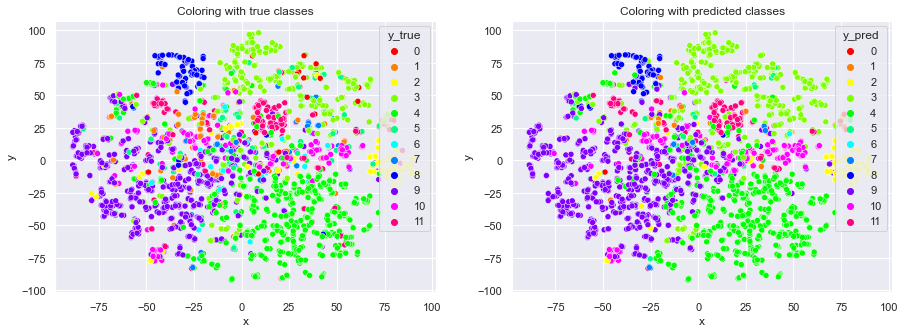

In [382]:
palette = ['#ff0000', '#ff8000', '#ffff00', '#80ff00', '#00ff00', '#00ff80', '#00ffff', '#0080ff', '#0000ff', '#8000ff', '#ff00ff', '#ff0080']
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15, 5)
y_true_plot = sns.scatterplot(data=df, x="x", y="y", hue='y_true', palette=sns.color_palette(palette, 12), ax=ax[0])
y_pred_plot = sns.scatterplot(data=df, x="x", y="y", hue='y_pred', palette=sns.color_palette(palette, 12), ax=ax[1])

y_true_plot.set_title('Coloring with true classes')
y_pred_plot.set_title('Coloring with predicted classes')

At first glance the figures look very similar, which indicates that the classification is working fairly well. 
When looking closer, one can see that in particular data points of one class, that are surrounded by datapoints of another class, are often misclassified. We believe that this is the case since, Random Forests essentially draw linear hyperplanes in feature space, which are the class boundaries. 

<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra point)</h2>

<div style="background-color:rgb(224, 243, 255)">
Train a logistic regression model on the high-dimensional vectors. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>

In [320]:
np.unique(test['label'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)